# kNN's
Nearest neighbours is a supervised algorithms to predict the class a data point belongs to accroding to the class of the _k_ nearest neighbours. The procedure can be done according to auser input number fo nearest neighbours (hence the _k_) or without this input using a radius to select the nearest neightbous to be used in inference.

In classfication we asign the predicted class as the most common amongst the nearest neighbours, in regression we can predict according to the average value of the nearest neighbour.

These are known as non-generalizing ML algorithmns since they have to memorize the entire training data set

### Pros:
- Simple to interpret and implement.
- Robust against outliers (they won't be near to anything) and noise.
- Despite its simplicity, nearest neighbors has been successful in a large number of classification and regression problems.
- Being non-parametric they can be succesful even in situations where the boundary is complex to describe.

### Cons
 - High compute cost due to the fact that all examples need to be memorized.
 - Doesn't scale well with the number of features to include.
 - All decisions are made based on locality.
 - Metric for distances needs to be found through experimentation.
 - Inference time is slow since it is a lazy learner.
 
### How it works

Given a user specified number of neearest neighbours _k_, the algorithm calculates the distance from the point we want to classify to every point in the (labelled) training set. The points are sorted according to the distance to the point we are inferring on:  

 - For classification, the prediction is the most common or popular label among the top _k_ neighbourse
 - For regression, the prediction is the average value of the top _k_ neighbours
 
### Illustrating the implementation from scratch (numpy)
First lets initialize some dummy data consisting of two classes labelled 'A' and 'B'

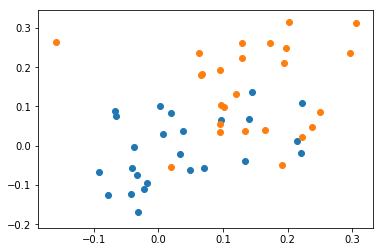

In [145]:
import numpy as np
import matplotlib.pyplot as plot
import operator

A = np.random.normal(0,0.1,size=(25,2))
B = np.random.normal(0,0.1,size=(25,2))

B[:,0]+=0.15
B[:,1]+=0.15
data_dict = {'A':A, 'B':B}
#
plot.scatter(A[:,0],A[:,1])
plot.scatter(B[:,0],B[:,1])

### Define functions implementing the kNN evaluation using L2 norm
- Find the distances to all the points
- Sort the points according to the distance to the test point and return most common class

In [141]:
def find_distance( X, P):
    return (X[:,0]-P[0])**2+(X[:,1]-P[1])**2

def KNN_predict_label(lab_set,X, k):
    distances = []
    classes = {}
    for key in lab_set:
        this_dist = find_distance(lab_set[key],X)
        for x in this_dist:
            distances.append((x, key))
        classes[key] = 0
    distances.sort(key = operator.itemgetter(0))
    for idx in range(k):
        classes[distances[idx][1]]+=1
    return max(classes.items(), key=operator.itemgetter(1))[0]

### Run a test
Given a number of neighbours and a test point we can return the new label

B


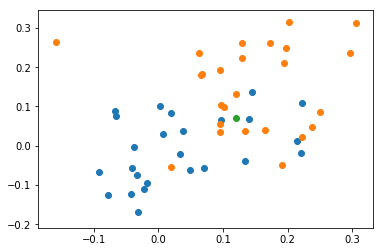

In [154]:
k_neighbours = 5
test_point = (0.12,0.07)
print(KNN_predict_label(data_dict, test_point,5))
plot.scatter(A[:,0],A[:,1])
plot.scatter(B[:,0],B[:,1])
plot.scatter(test_point[0],test_point[1] )